In [9]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score

import pickle

import warnings
warnings.filterwarnings('ignore')

### EVALUAR TEST

In [10]:
filename_prod = '../model/production/model'

with open(filename_prod, 'rb') as archivo_entrada:
    modelo_importado = pickle.load(archivo_entrada)

In [11]:
df_test = pd.read_csv('../data/test.csv')
df_test.reset_index(inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8170 entries, 0 to 8169
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 8170 non-null   int64  
 1   Género                8170 non-null   float64
 2   Hipertensión          8170 non-null   int64  
 3   Cardiopatía           8170 non-null   int64  
 4   Casado                8170 non-null   int64  
 5   AVG-Nivel de glucosa  8170 non-null   float64
 6   Glucosa_IMC           8170 non-null   float64
 7   Hiper_Cardiopatía     8170 non-null   int64  
 8   Infarto               8170 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 574.6 KB


In [12]:
df_test.describe()

,index,Género,Hipertensión,Cardiopatía,Casado,AVG-Nivel de glucosa,Glucosa_IMC,Hiper_Cardiopatía,Infarto
count,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000
mean,4084.500000,0.556548,0.212240,0.124480,0.824725,0.310523,0.216290,0.336720,0.498286
std,2358.620183,0.496822,0.408919,0.330148,0.380226,0.266960,0.158762,0.547721,0.500028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2042.250000,0.000000,0.000000,0.000000,1.000000,0.109316,0.104558,0.000000,0.000000
50%,4084.500000,1.000000,0.000000,0.000000,1.000000,0.197743,0.150976,0.000000,0.000000
75%,6126.750000,1.000000,0.000000,0.000000,1.000000,0.531057,0.298491,1.000000,1.000000
max,8169.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [13]:
X_test = df_test.drop(columns=['index', 'Infarto'])
y_test = df_test['Infarto']

print(X_test.shape)
print(y_test.shape)

(8170, 7)
(8170,)


In [14]:
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

y_pred = modelo_importado.predict(X_test_scaled)

fpr, tpr, thresh = roc_curve(y_test, y_pred)
print(auc(fpr, tpr).round(3))
print(roc_auc_score(y_test, y_pred).round(3))
accuracy_score(y_test, y_pred).round(3)

0.959
0.959


0.959

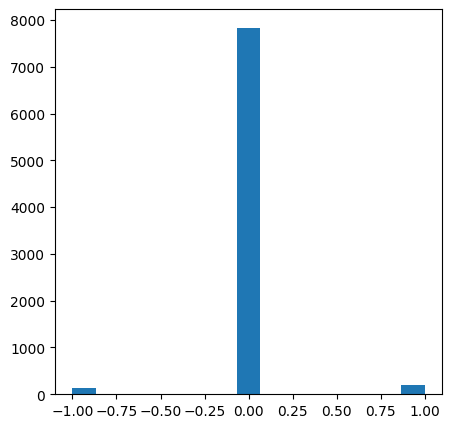

In [15]:
error = y_pred - y_test

plt.figure(figsize=(5, 5))
plt.hist(error, bins=15);

In [16]:
c_mat = confusion_matrix(y_test, y_pred, normalize='true')
c_mat

array([[0.95340327, 0.04659673],
       [0.0351265 , 0.9648735 ]])

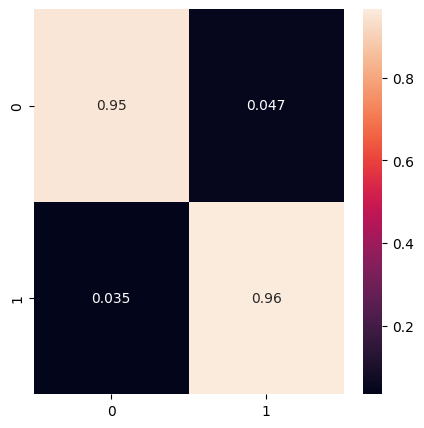

In [17]:
plt.figure(figsize=(5, 5))
sns.heatmap(c_mat, annot=True);

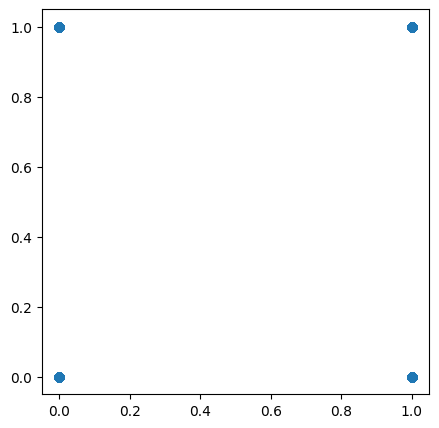

In [18]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred);

### EXPORTAR CSV CON LAS PREDICCIONES

In [19]:
df_test['Predicción'] = y_pred

submission = pd.DataFrame({'Id': df_test['index'], 'Predicción': df_test['Predicción']})

submission.to_csv('../data/submission.csv', index = False) # Muy importante --> index=False